In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('/content/loan_data_set.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#categorical columns one hot encoding
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes
ohe = OneHotEncoder()
gender =pd.DataFrame(ohe.fit_transform(df[['Gender']]).toarray())


df['Married']=df['Married'].astype('category')
df['Married']=df['Married'].cat.codes
ohe = OneHotEncoder()
married =pd.DataFrame(ohe.fit_transform(df[['Married']]).toarray())


df['Dependents']=df['Dependents'].astype('category')
df['Dependents']=df['Dependents'].cat.codes
ohe = OneHotEncoder()
Dependents =pd.DataFrame(ohe.fit_transform(df[['Dependents']]).toarray())

df['Education']=df['Education'].astype('category')
df['Education']=df['Education'].cat.codes
ohe = OneHotEncoder()
Education =pd.DataFrame(ohe.fit_transform(df[['Education']]).toarray())

df['Self_Employed']=df['Self_Employed'].astype('category')
df['Self_Employed']=df['Self_Employed'].cat.codes
ohe = OneHotEncoder()
Self_Employed =pd.DataFrame(ohe.fit_transform(df[['Self_Employed']]).toarray())

df['Property_Area']=df['Property_Area'].astype('category')
df['Property_Area']=df['Property_Area'].cat.codes
ohe = OneHotEncoder()
Property_Area =pd.DataFrame(ohe.fit_transform(df[['Property_Area']]).toarray())

df['Loan_Status']=df['Loan_Status'].astype('category')
df['Loan_Status']=df['Loan_Status'].cat.codes
ohe = OneHotEncoder()
Loan_Status =pd.DataFrame(ohe.fit_transform(df[['Loan_Status']]).toarray())
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
df=df.drop('Loan_ID',axis=1)
#df.head()#3mlt drop ll id
#df.isnull().sum()

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
df.shape

(614, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int8   
 1   Married            614 non-null    int8   
 2   Dependents         614 non-null    int8   
 3   Education          614 non-null    int8   
 4   Self_Employed      614 non-null    int8   
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int8   
 11  Loan_Status        614 non-null    int8   
dtypes: float64(4), int64(1), int8(7)
memory usage: 28.3 KB


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<Axes: >

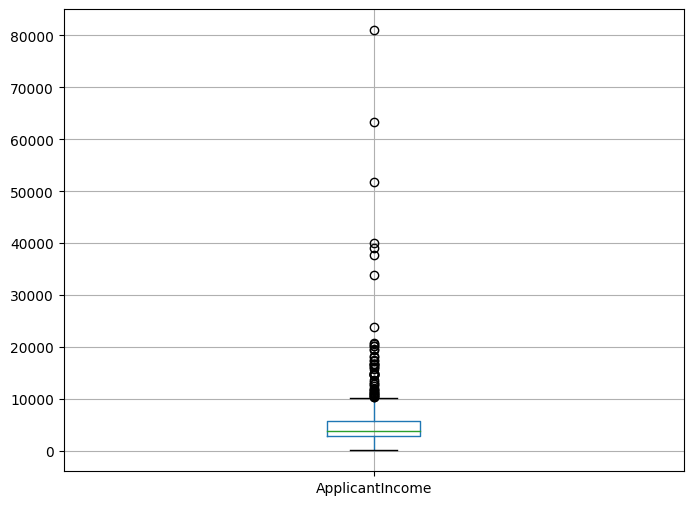

In [ ]:
# reset the figure size to the default size
plt.figure(figsize=(8, 6))

plt.rcdefaults()
df.boxplot(column='ApplicantIncome')

In [ ]:
corr_matrix = df.corr()

print(corr_matrix['Loan_Status'])
# Print the correlation between the target column and features in table
#corr = df.corr()
#corr
#sns.heatmap(corr, annot=True)
#plt.show()

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


In [ ]:
q1=df['ApplicantIncome'].quantile(0.25) 
q3= df['ApplicantIncome'].quantile(0.75)
IQR=q3-q1
width=1.5
mn= q1-1.5*IQR
mx= q3+1.5*IQR

In [ ]:
outliers = df.loc[(df['ApplicantIncome'] > mx) | (df['ApplicantIncome'] < mn), 'ApplicantIncome']

# replace outliers with maximum value
df.loc[df['ApplicantIncome'] > mx, 'ApplicantIncome'] = mx
df.loc[df['ApplicantIncome'] < mn, 'ApplicantIncome'] = mn

<Axes: >

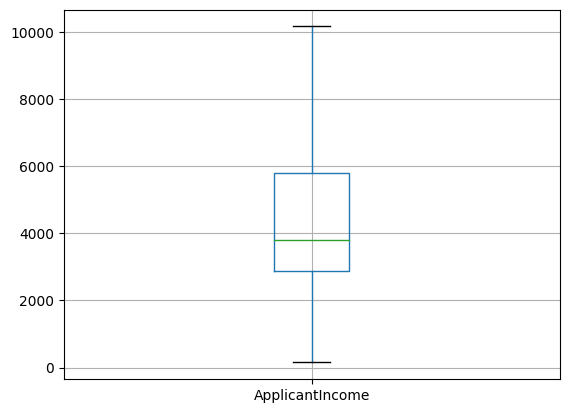

In [ ]:
df.boxplot(column='ApplicantIncome')

<Axes: >

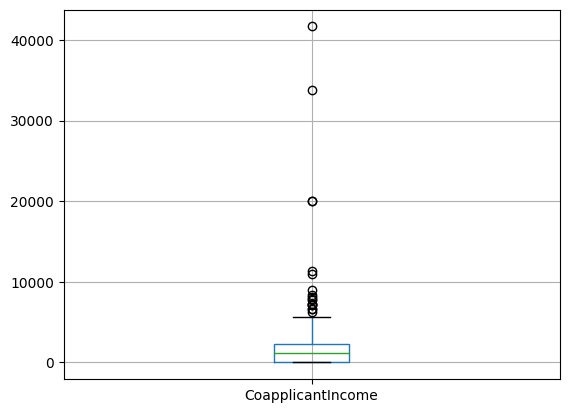

In [ ]:
df.boxplot(column='CoapplicantIncome')

<Axes: >

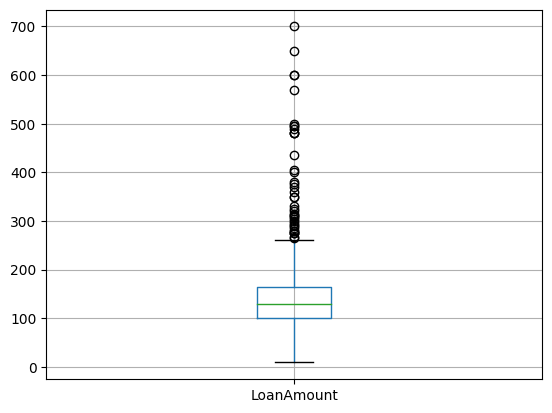

In [ ]:
df.boxplot(column='LoanAmount')

<Axes: >

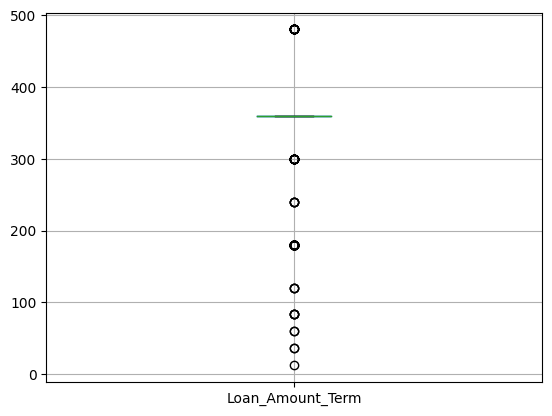

In [ ]:
df.boxplot(column='Loan_Amount_Term')

<Axes: >

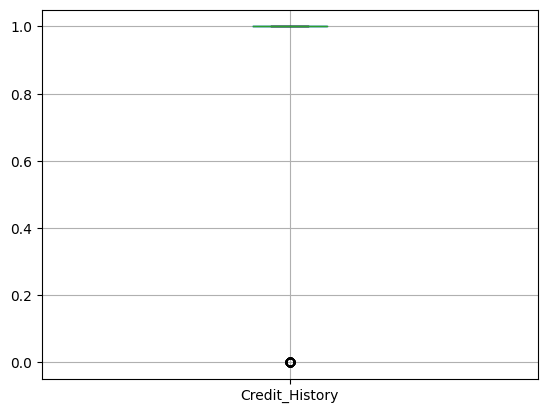

In [ ]:
df.boxplot(column='Credit_History')

<Axes: xlabel='Education', ylabel='count'>

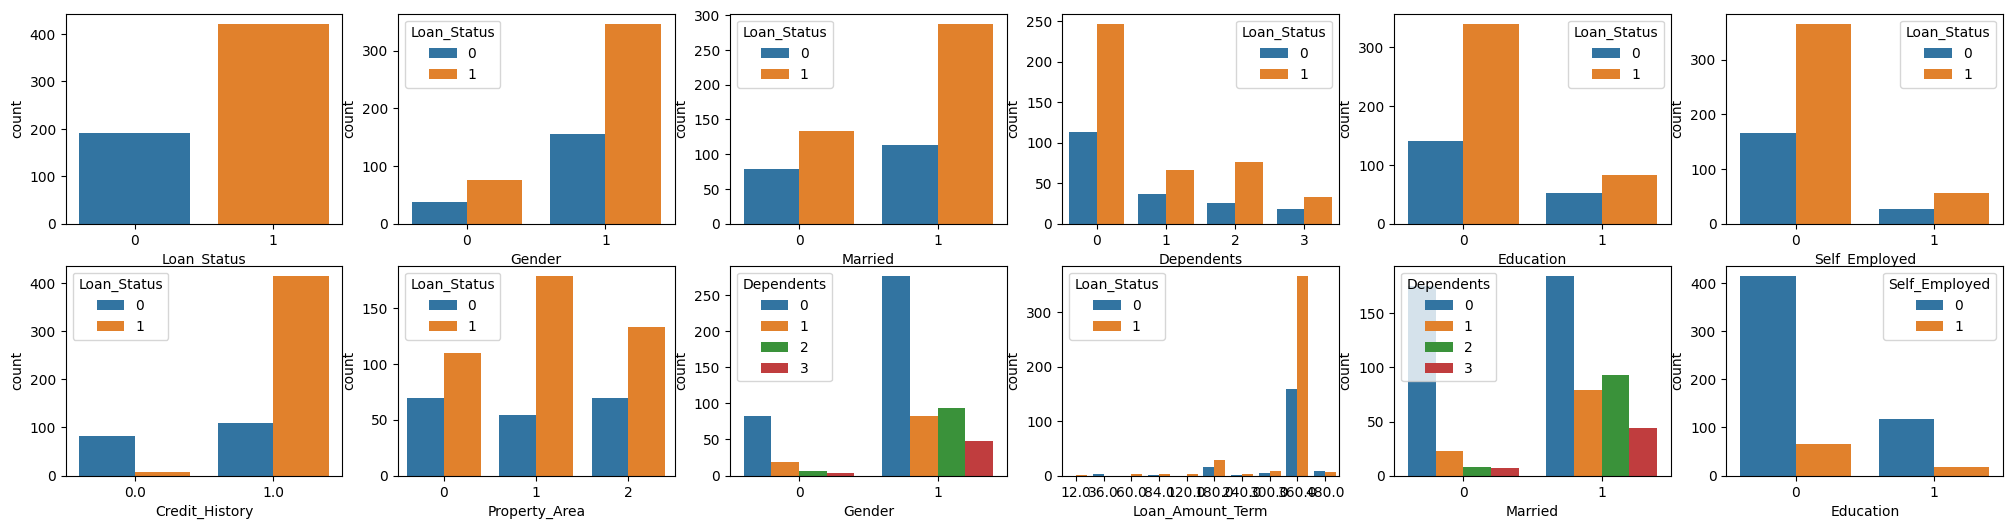

In [ ]:
fig, axs = plt.subplots(figsize = (25,6), ncols = 6, nrows = 2)
sns.countplot(x = df['Loan_Status'], ax = axs[0,0])
sns.countplot(x = df['Gender'], hue = df['Loan_Status'], ax = axs[0,1])
sns.countplot(x = df['Married'], hue = df['Loan_Status'], ax = axs[0,2])
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'], ax = axs[0,3])
sns.countplot(x = df['Education'], hue = df['Loan_Status'], ax = axs[0,4])
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'], ax = axs[0,5])

sns.countplot(x = df['Credit_History'], hue = df['Loan_Status'], ax = axs[1,0])
sns.countplot(x = df['Property_Area'], hue = df['Loan_Status'], ax = axs[1,1])
sns.countplot(x = df['Gender'], hue = df['Dependents'], ax = axs[1,2])
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'], ax = axs[1,3])
sns.countplot(x = df['Married'], hue = df['Dependents'], ax = axs[1,4])
sns.countplot(x = df['Education'], hue = df['Self_Employed'], ax = axs[1,5])

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

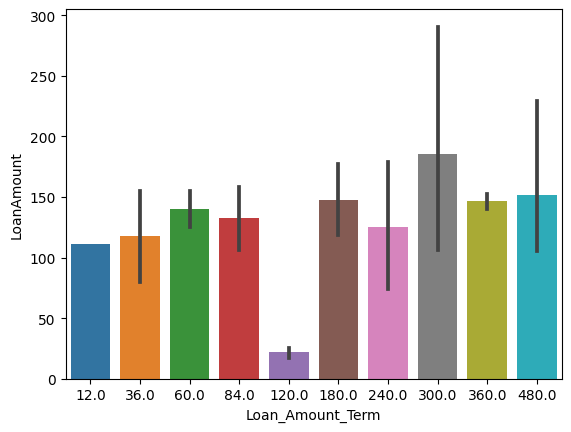

In [ ]:
sns.barplot(x = df['Loan_Amount_Term'], y = df['LoanAmount'])

<Axes: xlabel='Property_Area', ylabel='ApplicantIncome'>

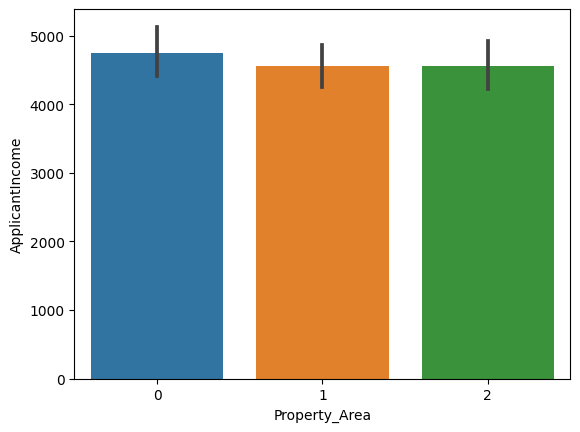

In [ ]:
sns.barplot(x = df['Property_Area'], y = df['ApplicantIncome'],)

<Figure size 1000x400 with 0 Axes>

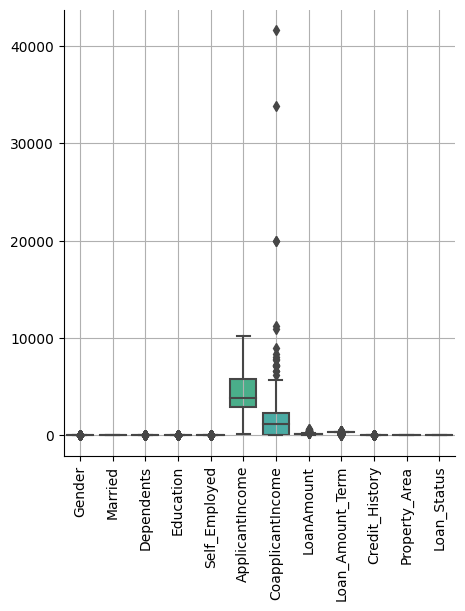

In [ ]:
plt.figure(figsize = (10,4))
sns.catplot(data=df, kind = 'box')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [ ]:
#q1=df['CoapplicantIncome'].quantile(0.25) 
#q3= df['CoapplicantIncome'].quantile(0.27)
#IQR=q3-q1
#width=1.5
#mn= q1-1.5*IQR
#mx= q3+1.5*IQR##

In [ ]:
#calcIQR('CoapplicantIncome')
#calcIQR('ApplicantIncome')

In [ ]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']


<Axes: >

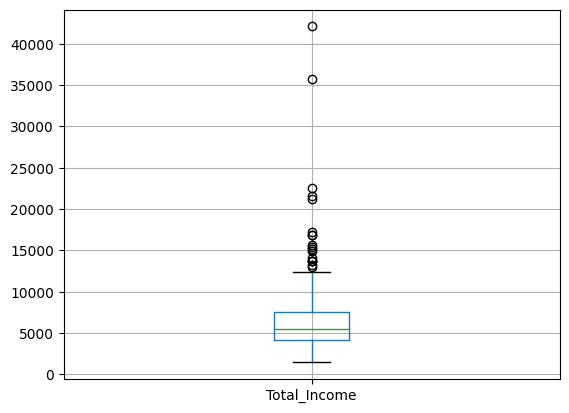

In [ ]:
df.boxplot(column='Total_Income')

In [ ]:
def calcIQR(column):
    if df[column].dtype !=object:
      q1=df[column].quantile(0.25) 
      q3= df[column].quantile(0.75)
      IQR=q3-q1
      width=1.5
      mn= q1-1.5*IQR
      mx= q3+1.5*IQR
      df.loc[df[column] > mx, column] = mx
      df.loc[df[column] < mn, column] = mn
    return df[column]    

In [ ]:
calcIQR('Total_Income')

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64

<Axes: >

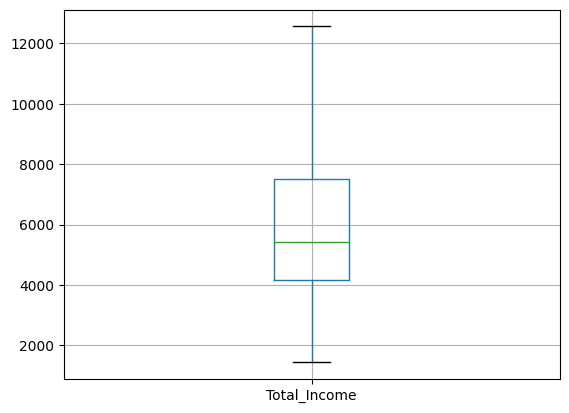

In [ ]:
df.boxplot(column='Total_Income')

In [ ]:
calcIQR('LoanAmount')

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

<Axes: >

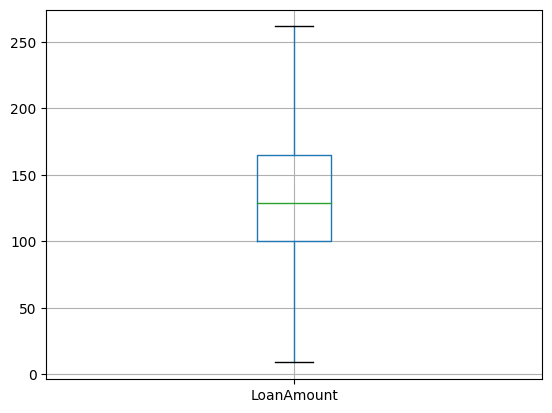

In [ ]:
df.boxplot(column='LoanAmount')

In [ ]:
#calcIQR('Loan_Amount_Term')

<Axes: >

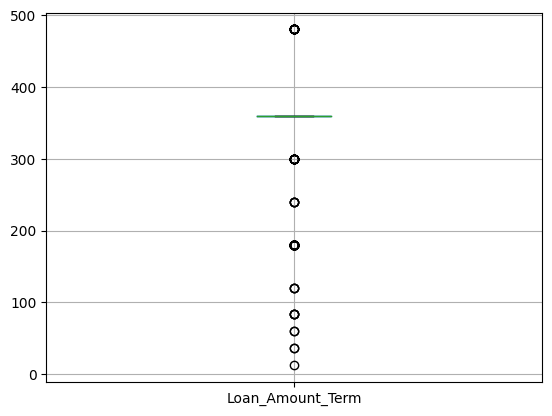

In [ ]:
df.boxplot(column='Loan_Amount_Term')

In [ ]:
corr_matrix = df.corr()
print(corr_matrix['Loan_Status'])

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.000442
CoapplicantIncome   -0.059187
LoanAmount          -0.052050
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
Loan_Status          1.000000
Total_Income        -0.002639
Name: Loan_Status, dtype: float64


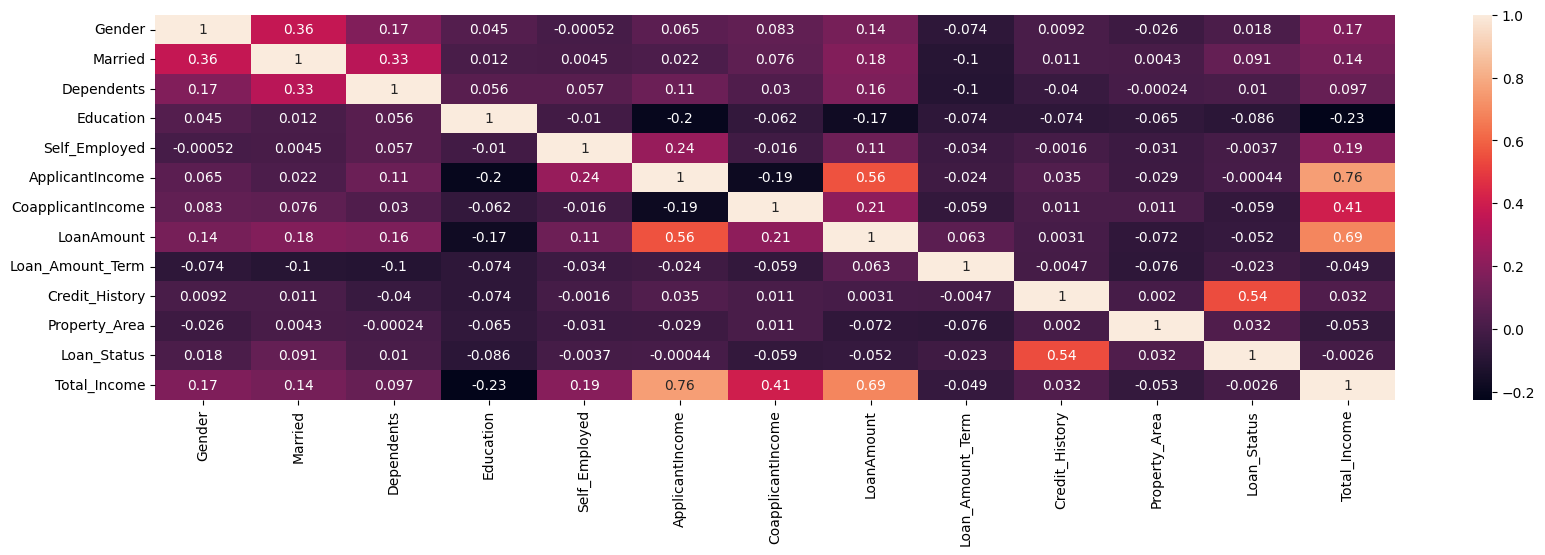

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1,6000.0


In [ ]:
#ss = StandardScaler()
#df.iloc[:,:-1] = ss.fit_transform(df.iloc[:,:-1])
#df.head()

In [ ]:
#scaler = StandardScaler()
#df[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Total_Income']] = scaler.fit_transform(df[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Total_Income']])



In [ ]:
y = df['Loan_Status']
x = df.drop(['ApplicantIncome','CoapplicantIncome','Loan_Status'], axis = 1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0


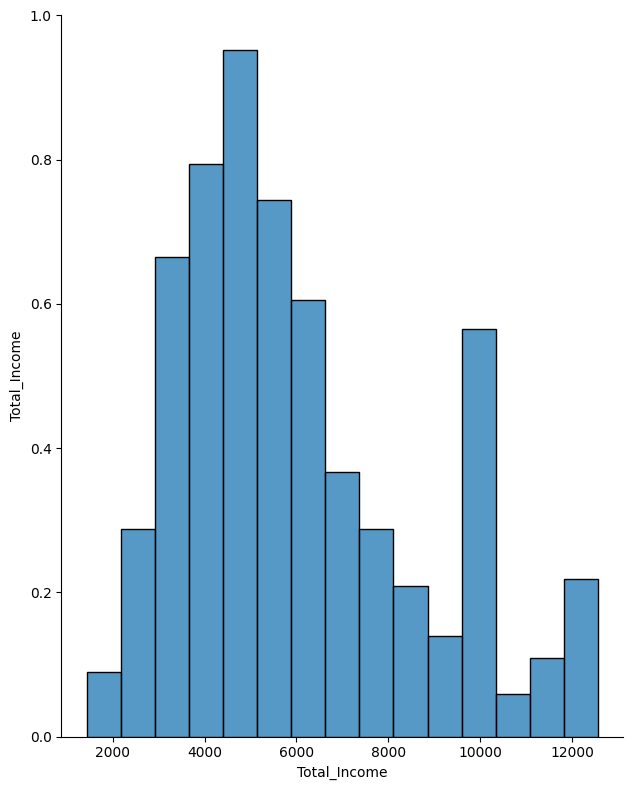

In [ ]:
sns.pairplot(data =df,vars=['Total_Income'],y_vars=df['Loan_Status'] ,height=8, aspect=0.8)

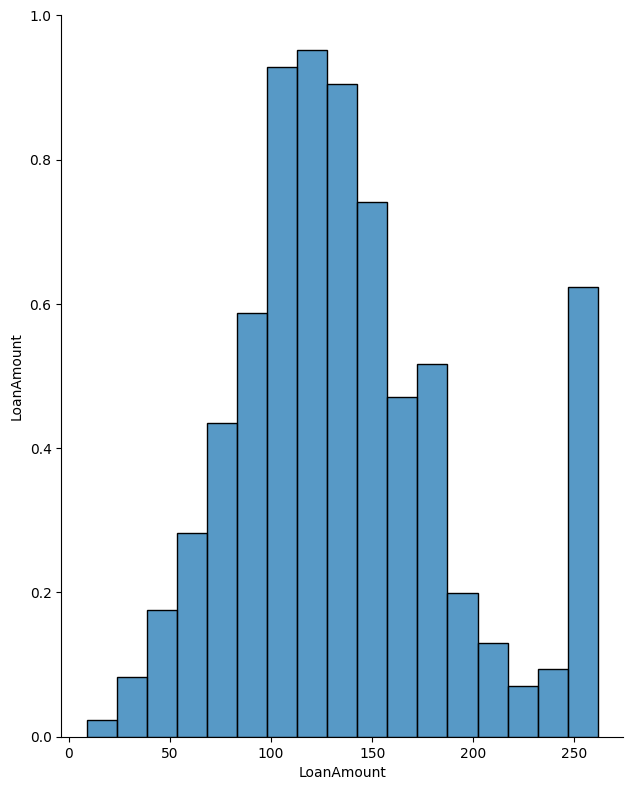

In [ ]:
sns.pairplot(data =df,vars=['LoanAmount'],y_vars=df['Loan_Status'] ,height=8, aspect=0.8)

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(x,y,test_size=0.23,random_state=44)
print(X_train)

     Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
425       1        1           0          0              0  121.000000   
117       1        1           1          0              0   85.000000   
110       1        0           0          0              0  136.000000   
102       1        1           0          0              0  146.412162   
541       0        0           0          0              0   99.000000   
..      ...      ...         ...        ...            ...         ...   
84        1        1           1          0              0   50.000000   
96        0        1           0          0              0  137.000000   
571       1        1           0          0              0  165.000000   
173       1        1           0          0              0  187.000000   
419       1        1           0          0              0  138.000000   

     Loan_Amount_Term  Credit_History  Property_Area  Total_Income  
425             360.0             1.0     

In [ ]:
def mymodel(model):
    model.fit(X_train,Y_train)
    ypred = model.predict(X_test)
    train_accuracy = metrics.f1_score(X_train,Y_train)
    test_accuracy = metrics.f1_score(X_test, Y_test)
    print(str(model)[:-2], 'Accuracy')
    print('Accuracy: ', accuracy_score(Y_test,ypred), "\nClassification Report: \n", classification_report(Y_test, ypred), '\nConfusion Matrix: \n', confusion_matrix(Y_test, ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')
    print()
    print()
    return model

In [ ]:
# Define the classifiers
#clf_dt = DecisionTreeClassifier(max_depth=4 )
clf_dt = DecisionTreeClassifier(max_depth=3) # 0.9015544041450777
#clf_nb = GaussianNB()
clf_lr = LogisticRegression(C=1,max_iter=1000)
clf_svm = svm.SVC(C=1, kernel='linear') #0.8944723618090452

# Train the models and predict the response for the test dataset
clf_dt.fit(X_train, Y_train)
y_pred_dt = clf_dt.predict(X_test)
#clf_nb.fit(X_train, Y_train)
#y_pred_nb = clf_nb.predict(X_test)
clf_lr.fit(X_train, Y_train)
y_pred_lr = clf_lr.predict(X_test)
clf_svm.fit(X_train, Y_train)
y_pred_svm = clf_svm.predict(X_test)

# Calculate the accuracies
acc_dt = metrics.f1_score(Y_test, y_pred_dt)
#acc_nb = metrics.f1_score(Y_test, y_pred_nb)
acc_lr = metrics.f1_score(Y_test, y_pred_lr)
acc_svm = metrics.f1_score(Y_test, y_pred_svm)
#Calculate accuracy of train data 
acc_dt_train=metrics.f1_score(Y_train,y_pred_dt)
acc_lr_train=metrics.f1_score(Y_train,y_pred_lr)
acc_svm_train=metrics.f1_score(Y_train,y_pred_svm)
# Print the accuracies
print("Accuracy of Decision Tree: ", acc_dt)
print("Accuracy of Decision Tree Train: ", acc_dt_train)
#print("Accuracy of Naive Bayes: ", acc_nb)
print("Accuracy of Logistic Regression: ", acc_lr)
print("Accuracy of Logistic Regression Train: ", acc_lr_train)
print("Accuracy of SVM: ", acc_svm)
print("Accuracy of SVM Train : ", acc_svm_train)
#print("Accuracy of Naive Bayes: ", acc_nb)


# Confusion Matrix
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_lr))
print("SVM Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_dt))